# Calibrating ensemble models with Bayesian binning

### Bayes theorem for calibrating binary classification models

Assuming that we know the predictions of an ensemble model trained to predict a binary variable *True_Label=\{0,1}* and the prior probability *P(1)* which is the probability for the event *True_Label=1*, we can use the *Bayesian* theorem to compute the calibrated prediction or posterior probability of the model.

\begin{equation} P(1|Prediction) = \frac{P(Prediction|1)*P(1)}{P(Prediction|1)*P(1)+P(Prediction|0)*P(0)} \end{equation}

*Note:* More information about *Bayes* theorem explained in the paper *Handmade_Naive_Bayes.pdf* from the repository *Coding-Machine-Learning-algorithms-from-scratch-in-R .*

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the ensemble model predictions

Import the *predictions* of the ensemble model and the *true label* (binary in this example) for each observation in a *validation* dataset, not used for training the model.

In [2]:
data = pd.read_excel('Ensemble model predictions in validation dataset.xlsx')
prediction = data["Prediction"]
true_label = data["True_Label"]
data.head()

,True_Label,Prediction
0,0,0.004622
1,0,0.261871
2,1,0.025343
3,0,0.194241
4,0,0.007017


The prediction range of the ensemble model is [0,1] equivalent to theoretical the range of probability for the event *True_Label=1*. Although, the model is not calibrated as we will see in the following plot because, for example, the bin with highest predicted values has not a 100% of positive *True_Label*. 

In [3]:
min(prediction),max(prediction)

(2.0520697034953628e-06, 0.9992258548736572)

### Prior probabilities

Compute the prior probability for the event *True_Label=1* equivalent to *P(1)* and *P(0)* in the initial formula. You can see that the *validation* dataset is unbalanced, which means that the % of *True_Labels=1* is different from 50%.

In [4]:
p1 = np.mean(true_label)
p0 = 1-p1
p1, p0

(0.2373748862602366, 0.7626251137397634)

### Bins

For binning the prediction in groups, compute the bins as evenly spaced samples calculated over the range of the predictions. You can see that the first and sample correspond to the minimum and maximum predicted values.

In [5]:
bins = np.linspace(0,1,11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Conditional distributions by binning predictions

Compute the frequeny distribution of predictions with *True_Label=1* by bins equivalent to *P(Prediction|1)* in the initial formula.

In [6]:
binned_prediction_given1 = np.histogram(prediction[true_label==1],bins)[0]/sum(true_label==1)
binned_prediction_given1

array([0.4657403 , 0.10541447, 0.08001917, 0.04743651, 0.04695736,
       0.04551989, 0.04264494, 0.0431241 , 0.05366555, 0.06947772])

Compute the frequency distribution of predictions with *True_Label=0* by bins equivalent to *P(Prediction|0)* in the initial formula.

In [7]:
binned_prediction_given0 = np.histogram(prediction[true_label==0],bins)[0]/sum(true_label==0)
binned_prediction_given0

array([0.78434004, 0.08337062, 0.03609247, 0.02296793, 0.02102908,
       0.01357196, 0.01282625, 0.00999254, 0.00745712, 0.00835198])

Check that both conditiona distributions sum 1.

In [8]:
sum(binned_prediction_given1), sum(binned_prediction_given0)

(0.9999999999999999, 1.0)

### Calibrated predictions

Compute the calibrated prediction or posterior probability by bins.

In [9]:
calibrated_binned_prediction = (p1*binned_prediction_given1)/(p1*binned_prediction_given1+p0*binned_prediction_given0)
calibrated_binned_prediction

array([0.15599422, 0.28241335, 0.40831296, 0.39130435, 0.41004184,
       0.51075269, 0.50857143, 0.57324841, 0.69135802, 0.72139303])

### Let's plot the distributions

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

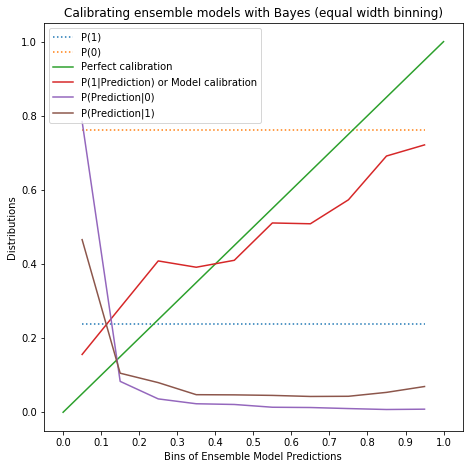

In [11]:
plt.figure(figsize=(7.5,7.5))
plt.plot(bins[1:]-0.05,np.repeat(p1,bins.shape[0]-1),label='P(1)',linestyle=":")
plt.plot(bins[1:]-0.05,np.repeat(p0,bins.shape[0]-1),label='P(0)',linestyle=":")
plt.plot([0,1],[0,1],label="Perfect calibration")
plt.plot(bins[1:]-0.05,calibrated_binned_prediction,label='P(1|Prediction) or Model calibration')
plt.plot(bins[1:]-0.05,binned_prediction_given0,label='P(Prediction|0)')
plt.plot(bins[1:]-0.05,binned_prediction_given1,label='P(Prediction|1)')
plt.xticks(bins)
plt.xlabel("Bins of Ensemble Model Predictions")
plt.ylabel("Distributions")
plt.title('Calibrating ensemble models with Bayes (equal width binning)')
plt.legend(loc='upper left')